In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import obspy
import netCDF4 as nc

In [2]:
import plots

In [3]:
%load_ext autoreload

In [4]:
st = obspy.read('../../../Projects/SHARP/splitting/shebapy_test/MONM/GB_MONM_20180420145936.HH?')
st_corr = obspy.read('../../../Projects/SHARP/splitting/shebapy_test/MONM/GB_MONM_20180420145936_corr.HH?')
result = nc.Dataset('/Users/eart0593/Projects/SHARP/splitting/shebapy_test/MONM/GB_MONM_20180420145936_sheba_result.nc')
for tr in st_corr:
    tr.stats.sac['a'] = result.wbeg
    tr.stats.sac['f'] = result.wend

for tr in st:
    tr.stats.sac['a'] = result.wbeg
    tr.stats.sac['f'] = result.wend

result


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: SHEBA splitting result
    zdate: 2018110
    ztime: 145936.440
    evla: 51.912
    evlo: -2.935
    evdp: 20.7
    station:     MONM
    stla: 51.83916
    stlo: -2.80417
    gcarc: 0.10898658
    dist: 12.118754
    az: 131.91997
    baz: 312.0229
    tlag: 0.37
    dtlag: 0.004375
    fast: -63.0
    dfast: 7.5
    spol: 97.88136
    dspol: 2.4078443
    tlagXC: 0.0325
    dtlagXC: 0.00375
    fastXC: -73.0
    dfastXC: 13.75
    wbeg: 7.1641054
    wend: 7.524024
    snr: 6.392073
    eigrat_orig: 0.39454257
    eigrat_corr: 0.043907885
    ndf: 19
    best_window: 99
    best_cluster: 1
    qfactor: -0.0
    intensity_estimated: -0.22900021
    intensity: -0.03359301
    dimensions(sizes): search_tlag(161), search_fast(181), window(100), cluster(2)
    variables(dimensions): float32 mw_wbeg(window), float32 mw_wend(window), float32 mw_tlag(window), float32 mw_dtlag(window),

In [5]:
st[0].stats

         network: GB
         station: MONM
        location: 00
         channel: HHE
       starttime: 2018-04-20T14:59:36.440000Z
         endtime: 2018-04-20T14:59:51.440000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 1501
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'depmin': -0.00011505034, 'depmax': 8.579299e-05, 'scale': 1.0, 'b': 0.0, 'e': 15.0, 'a': 7.1641054, 't1': 4.06, 't2': 7.24, 'f': 7.524024, 'stla': 51.83916, 'stlo': -2.80417, 'stel': 145.0, 'evla': 51.912, 'evlo': -2.935, 'evdp': 20.7, 'mag': 2.1, 'user0': 7.0899997, 'user1': 7.1733685, 'user2': 7.491229, 'user3': 7.524024, 'dist': 12.118754, 'az': 131.91997, 'baz': 312.0229, 'gcarc': 0.10898658, 'depmen': 2.1765778e-10, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2018, 'nzjday': 110, 'nzhour': 14, 'nzmin': 59, 'nzsec': 36, 'nzmsec': 440, 'nvhdr': 6, 'npts': 1501, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'MONM',

(6.0, 8.0)

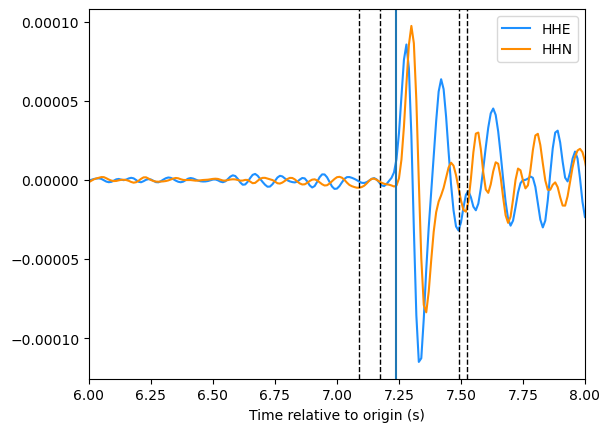

In [6]:
plots._plot_traces(st, show_window_range=True)
plt.axvline(st[0].stats.sac['t2'])
plt.xlim([6,8])

In [15]:
st_corr

3 Trace(s) in Stream:
GB.MONM.00.HHE | 2018-04-20T14:59:36.440000Z - 2018-04-20T14:59:51.440000Z | 100.0 Hz, 1501 samples
GB.MONM.00.HHN | 2018-04-20T14:59:36.440000Z - 2018-04-20T14:59:51.440000Z | 100.0 Hz, 1501 samples
GB.MONM.00.HHZ | 2018-04-20T14:59:36.440000Z - 2018-04-20T14:59:51.440000Z | 100.0 Hz, 1501 samples

/var/folders/29/f17bmxr12kl590498334yprw0000gq/T/ipykernel_38192/3903888471.py:20: UserWarning: linewidths is ignored by contourf
  C = ax4.contourf(TLAG, PHI, result.variables['lam2_norm_grid'][:]/ result.variables['lam2_norm_grid'][:].min(),
/var/folders/29/f17bmxr12kl590498334yprw0000gq/T/ipykernel_38192/3903888471.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/29/f17bmxr12kl590498334yprw0000gq/T/ipykernel_38192/3903888471.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


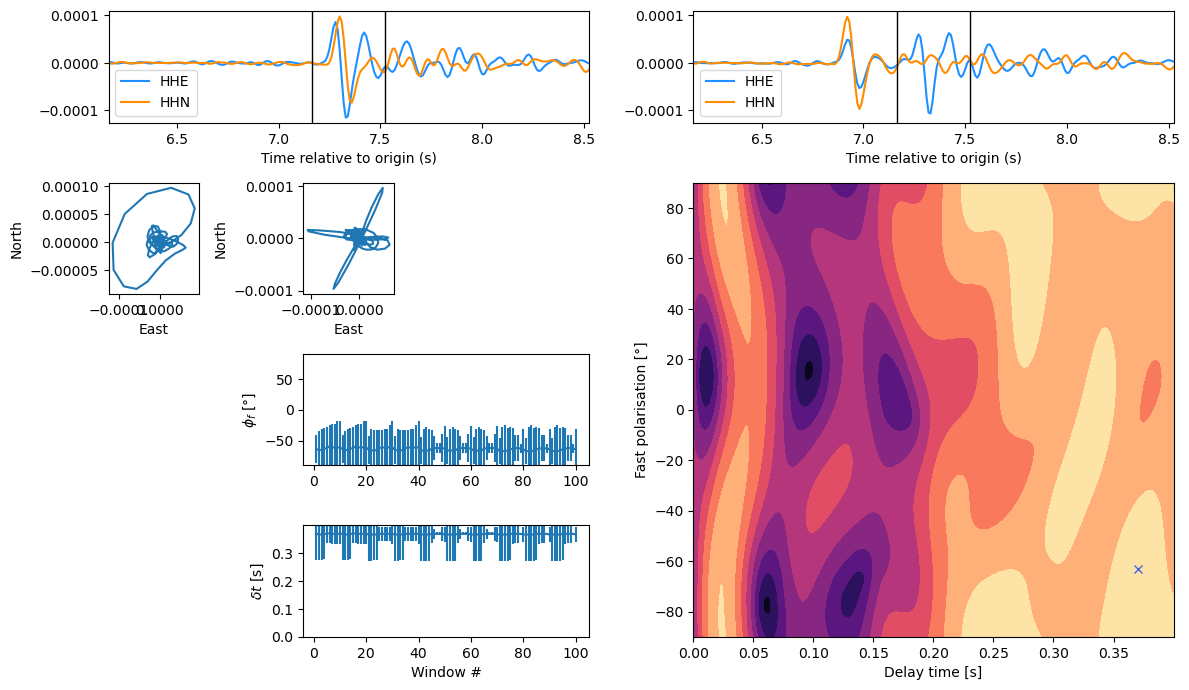

In [66]:
fig = plt.figure(layout="constrained", figsize= (12,7))

gs = GridSpec(4, 6, figure=fig)

ax1 = fig.add_subplot(gs[0,0:3])
plots._plot_traces(st, show_final_window=True, axes=ax1)
ax1.set_xlim([result.wbeg -1, result.wend + 1])
ax2 = fig.add_subplot(gs[0,3:], sharey=ax1)
plots._plot_traces(st_corr, show_final_window=True, axes=ax2)
ax2.set_xlim([result.wbeg -1, result.wend + 1])
ax3 = fig.add_subplot(gs[1, 0])
plots._ppm(ax3, st)
ax4 = fig.add_subplot(gs[1, 1])
plots._ppm(ax4, st_corr)
ax4 = fig.add_subplot(gs[1:4, 3:6])
phis = result.variables['fast_vector'][:]
dts = result.variables['tlag_vector'][:]
PHI, TLAG = np.meshgrid(phis, dts)

C = ax4.contourf(TLAG, PHI, result.variables['lam2_norm_grid'][:]/ result.variables['lam2_norm_grid'][:].min(),
            linewidths = [3, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5], cmap='magma_r')
ax4.plot(result.tlag, result.fast, 'x', color='royalblue')
ax4.set_ylabel('Fast polarisation [°]')
ax4.set_xlabel('Delay time [s]')
ax4.set_xlim([dts.min(), dts.max()])
ax4.set_ylim([phis.min(), phis.max()])
# ax4.clabel(C, C.levels, fmt ='%2i')
# ax4.set_xlim([0,0.2])
# Window clustser fast
wind_num = np.arange(0,result.dimensions['window'].size) + 1 #shift to start from 1
ax5 = fig.add_subplot(gs[2,0:3])
ax5.errorbar(x=wind_num, y=result.variables['mw_fast'][:], yerr=result.variables['mw_dfast'][:])
ax5.set_ylim([phis.min(),phis.max()])
ax5.set_ylabel(r'$\phi_f$ [°]')
ax6 = fig.add_subplot(gs[3,0:3])
ax6.errorbar(x=wind_num, y=result.variables['mw_tlag'][:], yerr=result.variables['mw_dtlag'][:])
ax6.set_ylim([dts.min(), dts.max()])
ax6.set_ylabel(r'$\delta t$ [s]')
ax6.set_xlabel('Window #')

ax7 = fig.add_subplot(gs[1,2])
ax7.scatter(x=result.variables['cluster_xc0'], y=result.variables['clusteryc0'])
ax7.plot(x=result.variables['cluster_xc0'][result.], y=result.variables['clusteryc0'])
plt.tight_layout()
fig.show()

In [ ]:
plots.plot_traces(obspy.read('../../../Projects/SHARP/splitting/shebapy_test/MONM/GB_MONM_20180224053715.HH?'), show_final_window=True)

AttributeError: module 'plots' has no attribute 'plot_traces'

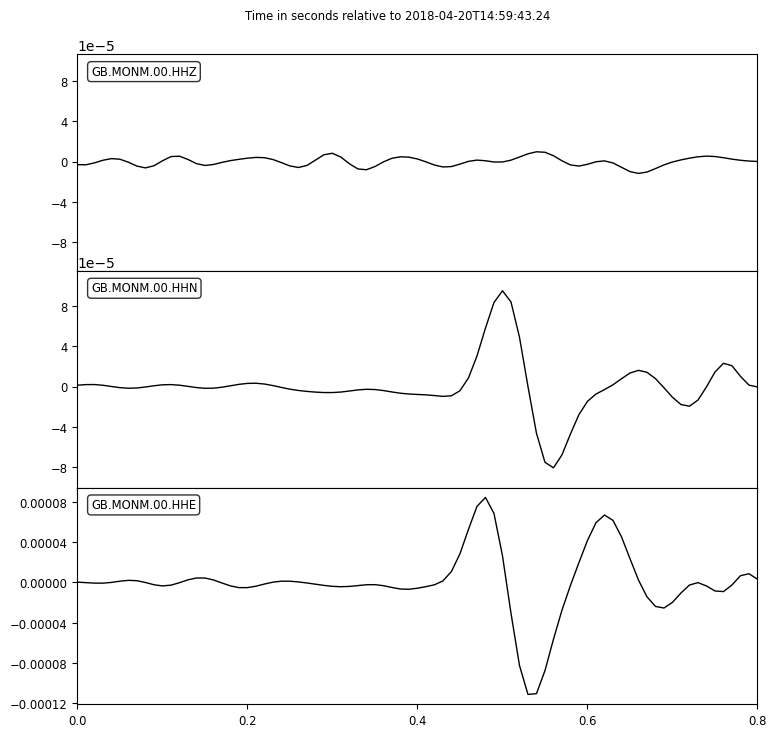

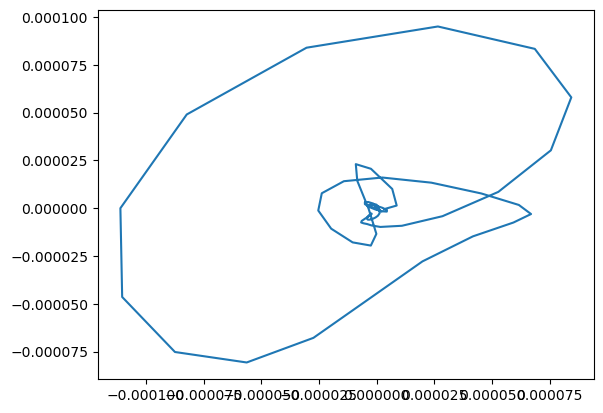

In [ ]:
st = obspy.read('../../../Projects/SHARP/splitting/shebapy_test/MONM/GB_MONM_20180420145936.HH?')
st.trim(st[0].stats.starttime + 6.8, st[0].stats.starttime + 7.6)
st.filter('bandpass', freqmin=2, freqmax=20, corners=2, zerophase=True)
st.plot(type='relative')
# st_corr.plot(type='relative')
plt.plot(st.select(channel='*E')[0].data, st.select(channel='*N')[0].data)

TypeError: _ppm() missing 2 required positional arguments: 'wbeg' and 'wend'

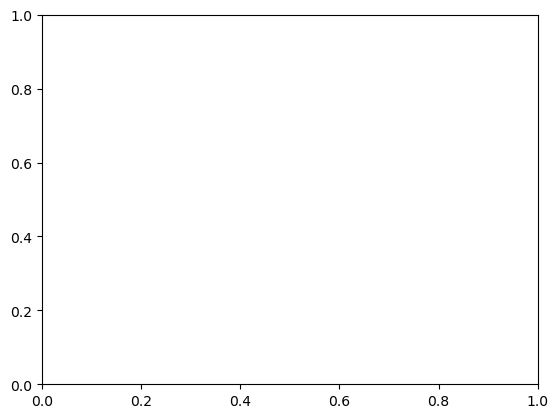

In [ ]:
fig, ax = plt.subplots(1)
plots._ppm(ax=ax, st=st)

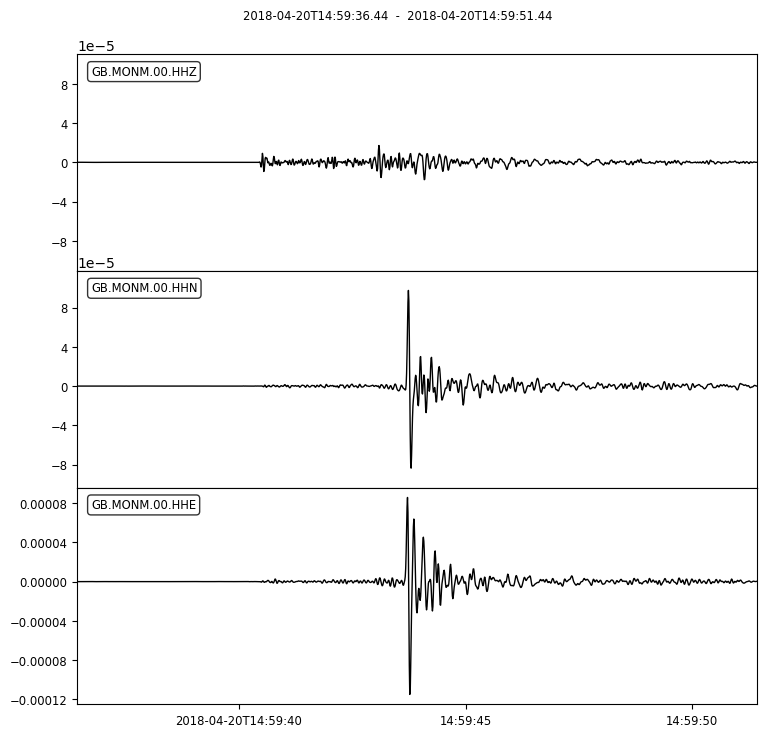

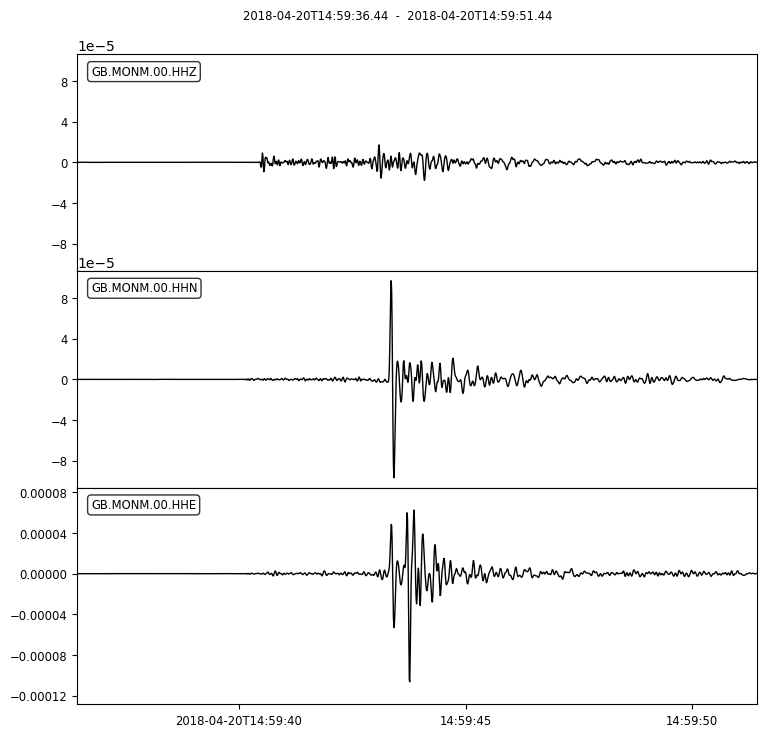

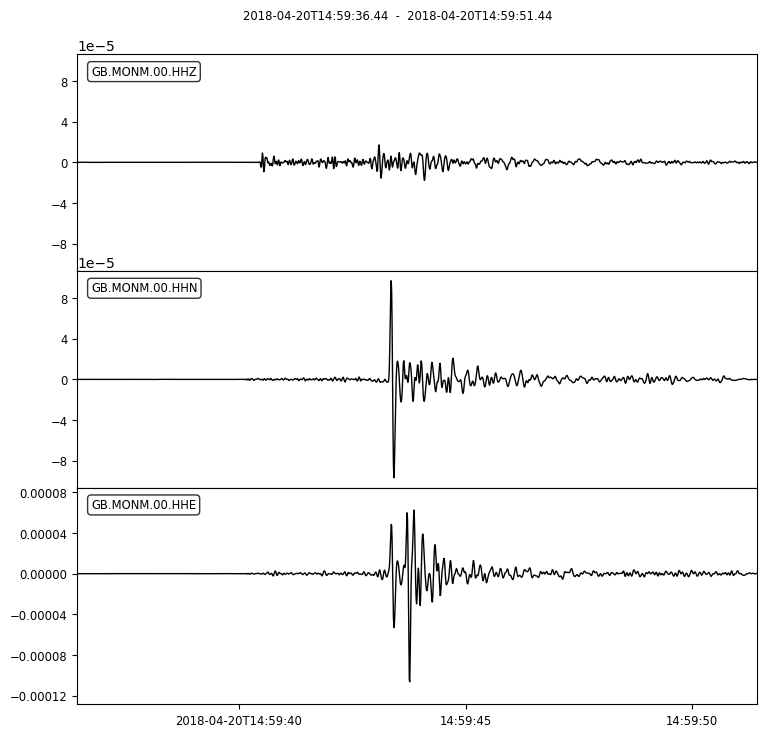

In [18]:
st.plot()
st_corr.plot()

In [72]:
result.variables['cluster_xc0'][:]

masked_array(data=[0.36984357, 0.36750013],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [38]:
result

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: SHEBA splitting result
    zdate: 2018110
    ztime: 145936.440
    evla: 51.912
    evlo: -2.935
    evdp: 20.7
    station:     MONM
    stla: 51.83916
    stlo: -2.80417
    gcarc: 0.10898658
    dist: 12.118754
    az: 131.91997
    baz: 312.0229
    tlag: 0.37
    dtlag: 0.004375
    fast: -63.0
    dfast: 7.5
    spol: 97.88136
    dspol: 2.4078443
    tlagXC: 0.0325
    dtlagXC: 0.00375
    fastXC: -73.0
    dfastXC: 13.75
    wbeg: 7.1641054
    wend: 7.524024
    snr: 6.392073
    eigrat_orig: 0.39454257
    eigrat_corr: 0.043907885
    ndf: 19
    best_window: 99
    best_cluster: 1
    qfactor: -0.0
    intensity_estimated: -0.22900021
    intensity: -0.03359301
    dimensions(sizes): search_tlag(161), search_fast(181), window(100), cluster(2)
    variables(dimensions): float32 mw_wbeg(window), float32 mw_wend(window), float32 mw_tlag(window), float32 mw_dtlag(window),

In [53]:
result.best_cluster

1

In [32]:
tr =  st[0]
obspy.io.sac.SACTrace(tr)

/Users/eart0593/anaconda3/envs/devel/lib/python3.11/site-packages/obspy/io/sac/arrayio.py:507: UserWarning: Non-integers may be truncated: leven = GB.MONM.00.HHE | 2018-04-20T14:59:36.440000Z - 2018-04-20T14:59:51.440000Z | 100.0 Hz, 1501 samples
  warnings.warn(msg.format(hdr, value))


ValueError: setting an array element with a sequence.